In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

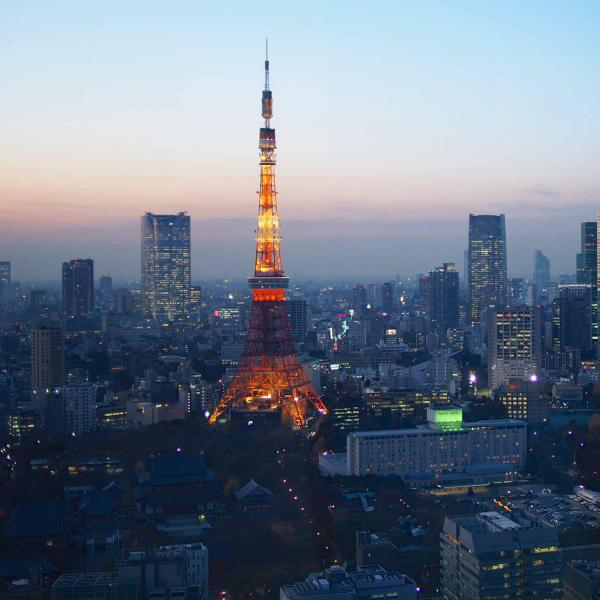

In [2]:
path_img = './assets/img/5c7a814eabba882a6f3f41abbfecb2d0.jpg'
图片 = Image.open(path_img)
图片 = Image.fromarray(np.array(图片)[:600, :600])
图片

In [3]:
矩阵 = np.array(图片).astype(np.float32)
print(矩阵.shape, 矩阵.dtype)

(600, 600, 3) float32


In [4]:
固有值, 固有向量 = np.linalg.eig(矩阵[:,:,0])

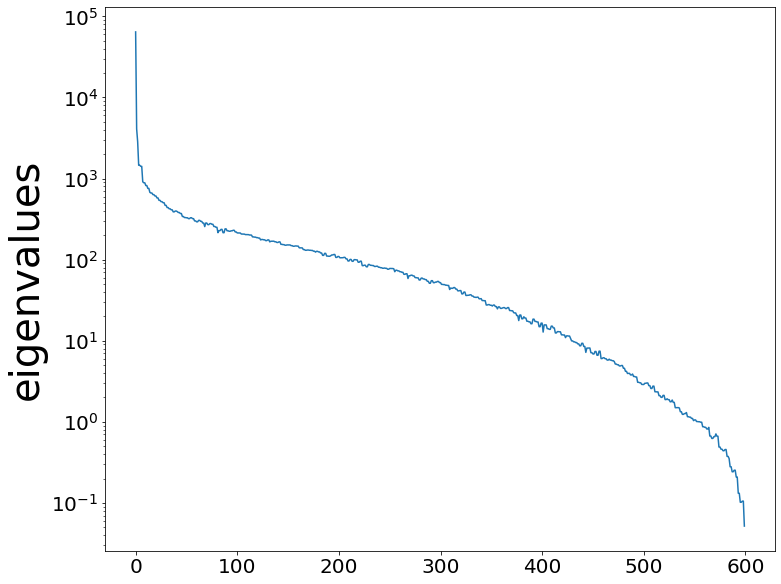

In [5]:
固有值绝对值 = np.absolute(固有值)
fig, ax = plt.subplots(1, 1, figsize=(12,10))
plt.plot(固有值绝对值)
plt.yscale('log')
ax.set_ylabel("eigenvalues")
ax.yaxis.label.set_size(40)
ax.tick_params(labelsize=20)

In [31]:
def 选取矩阵部分固有值进行压缩(矩阵, 固有值个数):
    # 固有值分解
    固有值, 固有向量 = np.linalg.eig(矩阵)

    # 选取前 N 个信息量最大的固有值
    部分的固有值 = 固有值[0:固有值个数]
    部分的固有向量 = 固有向量[:,0:固有值个数]
    部分的固有向量的转置 = np.linalg.inv(固有向量)[0:固有值个数, :]

    # 从选取的部分固有值复原矩阵
    Lambda = np.diag(部分的固有值)
    复原矩阵 = 部分的固有向量 @ np.linalg.matrix_power(Lambda, 2) @ 部分的固有向量的转置
    print(复原矩阵)
    复原矩阵 = 复原矩阵.real

    # 数值调整到 [0,255]之间
    复原矩阵 = (复原矩阵 - 复原矩阵.min()) / (复原矩阵.max() - 复原矩阵.min()) * 255
    复原矩阵 = np.clip(复原矩阵,0,255).astype(np.uint8)
    return 复原矩阵

固有值总数量: 600; 只使用其中的 10 个进行重建
[[11597878. -2.5490132e-05j 11625449. +6.3440923e-05j
  11645301. +2.9167273e-05j ... 11348626. -8.2919301e-05j
  11612505. +3.5543926e-06j 11376437. +7.2846218e-05j]
 [11597961. +3.0854149e-05j 11625587. -2.3832792e-05j
  11645450. +8.2482817e-05j ... 11348491. -2.0343829e-05j
  11612216. +2.0813892e-05j 11376232. -1.5327454e-04j]
 [11606992. -1.4774181e-05j 11634797. -6.9469213e-05j
  11654620. +5.1641706e-05j ... 11356186. -1.1017059e-04j
  11619564. -9.1860275e-05j 11383588. -6.7179608e-05j]
 ...
 [ 1066900.4-5.1872878e-05j  1077594.8+1.4260571e-05j
   1082398.6-1.1012162e-05j ...  1118858.4-3.3510759e-04j
   1162897.9+2.3571253e-04j  1129324.4-7.4059208e-05j]
 [ 1145789.6+8.7660446e-05j  1152595.1+3.4401848e-05j
   1157621.4+1.3318819e-04j ...  1176342.9-3.0403151e-04j
   1222758.4-1.8631399e-04j  1193189. +2.2424560e-05j]
 [ 1198229.1+2.4758204e-04j  1206105.9-8.7715278e-05j
   1213563. -5.3444994e-05j ...  1233863.8+4.8300880e-04j
   1280883.1-4.8442

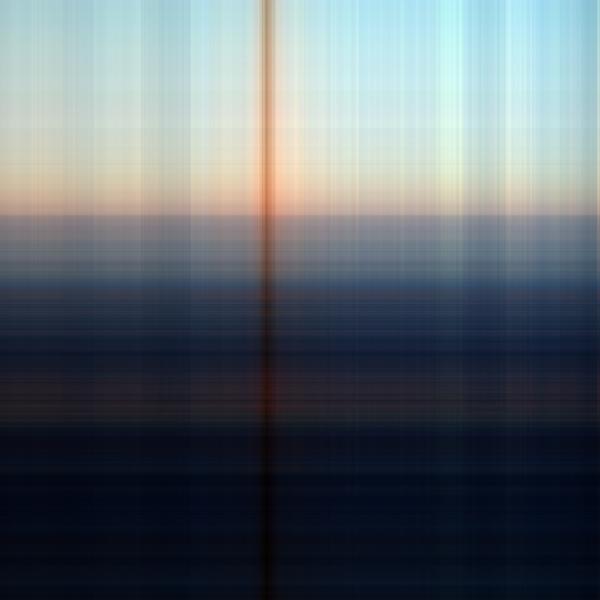


固有值总数量: 600; 只使用其中的 50 个进行重建
[[11588504. -5.53090649e-05j 11621431. +1.19516371e-04j
  11640119. +9.14448756e-05j ... 11341840. -2.60243658e-04j
  11605567. -8.72555393e-05j 11373503. -7.19830132e-05j]
 [11588626. +3.87175023e-05j 11621667. -3.95423442e-04j
  11640342. +8.09211924e-05j ... 11341459. +3.04396890e-05j
  11605159. -1.09193577e-04j 11373343. -1.85961369e-04j]
 [11598024. -2.13130879e-05j 11630489. -9.47580920e-05j
  11649342. -5.99380437e-05j ... 11348820. -2.85985327e-04j
  11612273. -1.37020790e-04j 11380827. +9.75929433e-05j]
 ...
 [ 1079926.5-4.63531644e-04j  1093530. +1.61080889e-03j
   1093543.5-1.96115626e-03j ...  1124118.4+6.24453241e-06j
   1149447.4+6.17114943e-04j  1111911.8+1.11740817e-04j]
 [ 1155928. +4.84365795e-04j  1154123.5-2.55744584e-04j
   1157523.1+2.82480265e-04j ...  1220757.6-9.34603217e-04j
   1249635.6-8.31033627e-04j  1197552.9+4.23112011e-04j]
 [ 1214712.5+2.53001403e-04j  1212676.1+9.46778338e-04j
   1215172.1-3.76837153e-04j ...  1257721. +

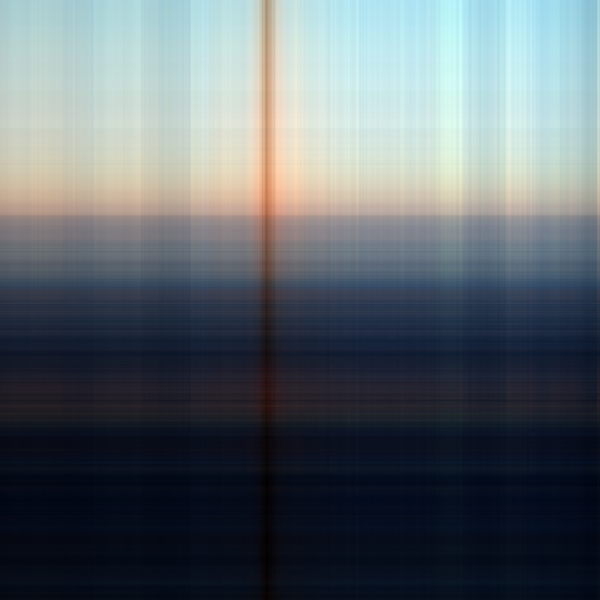


固有值总数量: 600; 只使用其中的 100 个进行重建
[[11586754. -3.9207036e-05j 11616673. +6.9566406e-05j
  11636217. +2.5982127e-04j ... 11344935. -1.8421651e-04j
  11609071. -2.5445770e-05j 11374290. -6.4526001e-05j]
 [11586776. -1.8111794e-05j 11616858. -3.9935304e-04j
  11636463. +1.0298693e-04j ... 11344828. +6.4045744e-05j
  11608958. -8.2082974e-05j 11374087. -2.6892510e-04j]
 [11595691. +4.7258858e-05j 11626132. -1.5670614e-04j
  11645768. -1.6725011e-04j ... 11352969. -3.6169274e-04j
  11617339. -1.0017768e-04j 11381939. +2.1553802e-05j]
 ...
 [ 1079490. -4.9798621e-04j  1085344.9+1.5401733e-03j
   1087761.6-2.4669559e-03j ...  1117150.6-6.9417525e-05j
   1154928.2+4.8940105e-04j  1117581.6-8.5806838e-05j]
 [ 1161035. +6.0118141e-04j  1159043.5-1.0797778e-03j
   1163521.6+3.6740466e-04j ...  1185419.8-8.2350965e-04j
   1222326.8-5.2717514e-04j  1196025.8+3.3748246e-04j]
 [ 1214357.4+1.3047699e-03j  1217923.6+1.1169657e-03j
   1217311.4-2.1367148e-03j ...  1237995.4+6.8607240e-04j
   1282777.1+1.60

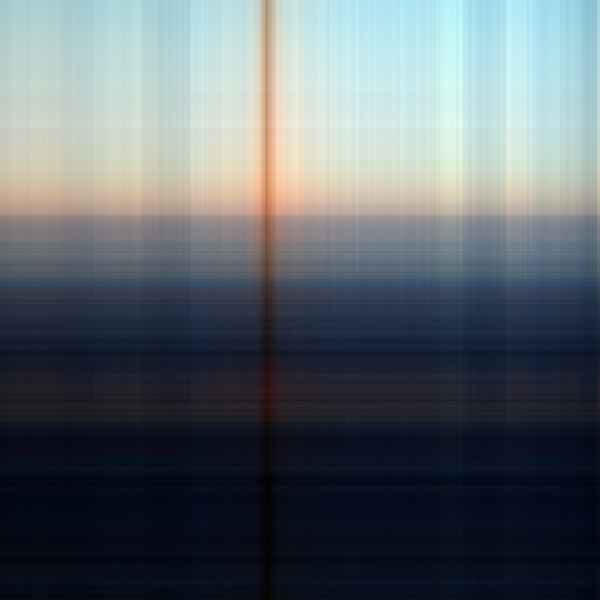


固有值总数量: 600; 只使用其中的 200 个进行重建
[[11586318.  -15.185871j  11616288.  -32.31095j   11636691.  -31.936462j
  ... 11345323.   +5.294797j  11609789.  +27.860308j
  11373989.  +35.71041j  ]
 [11586465.  -11.281134j  11616465.  -22.55669j   11636868.  -27.823517j
  ... 11345305.   +4.6657805j 11609675.  +24.660786j
  11374013.  +31.117035j ]
 [11595540.   -5.9220085j 11625229.   -9.971466j  11645628.  -19.90419j
  ... 11353361.   +3.3953972j 11617706.  +18.069763j
  11382052.  +22.266773j ]
 ...
 [ 1078743.2-190.93222j    1086809.1-406.78116j    1091392.6-400.02078j
  ...  1117298.6 +66.301384j   1155591.8+348.81613j
   1116638.5+447.28278j  ]
 [ 1157950.9-210.28339j    1163899.1-552.41016j    1168905.1-144.73071j
  ...  1185385.1 +20.171162j   1227426.  +98.04863j
   1191109.8+161.40247j  ]
 [ 1213178.4+160.76056j    1215630.5+340.3625j     1220285.8+342.86273j
  ...  1238204.  -56.906136j   1286004.8-299.5545j
   1248738.8-383.38455j  ]]
[[14775834. +5.4381173e-05j 14824157. +7.5816220e-05j

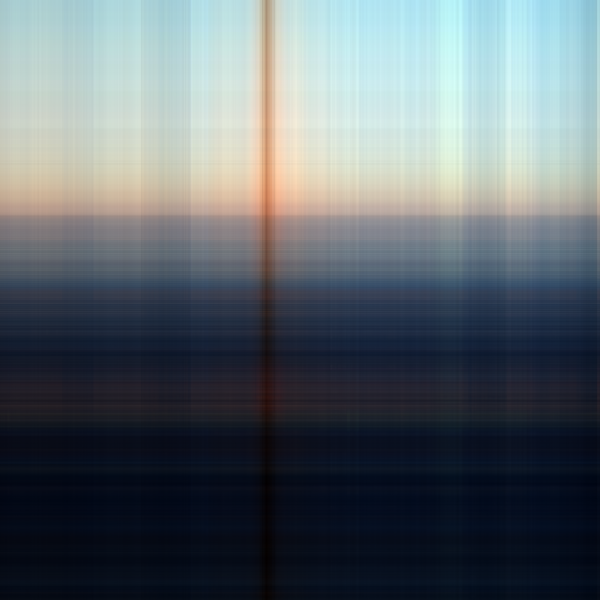


固有值总数量: 600; 只使用其中的 400 个进行重建
[[11586602. -1.4392529e+00j 11616789. -3.0438409e+00j
  11636981. -1.2386456e+00j ... 11345403. +8.8040161e-01j
  11609101. -6.4112163e-01j 11374098. +3.6630630e-03j]
 [11586602. -1.5731360e+00j 11616788. -2.1701126e+00j
  11636948. +7.7045584e-01j ... 11345373. +9.1950953e-01j
  11609097. -3.4167564e-01j 11374092. +5.8976650e-02j]
 [11595776. -1.8268676e+00j 11625625. -3.4229527e+00j
  11645788. -7.6341236e-01j ... 11353426. +1.1009798e+00j
  11617202. -6.7706013e-01j 11382100. +2.5721073e-02j]
 ...
 [ 1079211.4+9.4392128e+00j  1086733. +2.4549877e+01j
   1092447.1+1.6539433e+01j ...  1117617.9-5.9457397e+00j
   1155248.1+5.6277351e+00j  1115456.4+1.9403267e-01j]
 [ 1157256.2+1.7069874e+00j  1163004.1+9.6844521e+00j
   1168212.9+1.2626538e+01j ...  1184288. -1.2706013e+00j
   1226723.5+2.6451159e+00j  1190525.4+2.8542805e-01j]
 [ 1212573.1-7.4611025e+00j  1217973.8-2.2842510e+01j
   1222508.4-1.9390926e+01j ...  1237021.5+4.8284626e+00j
   1286588.5-5.51

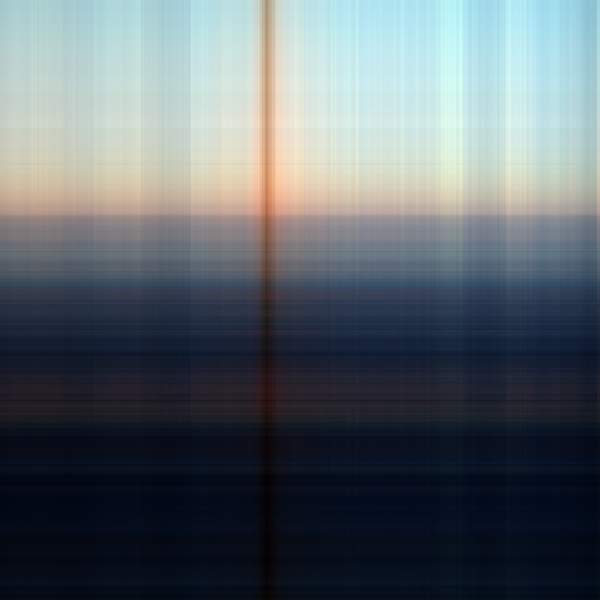


原图像


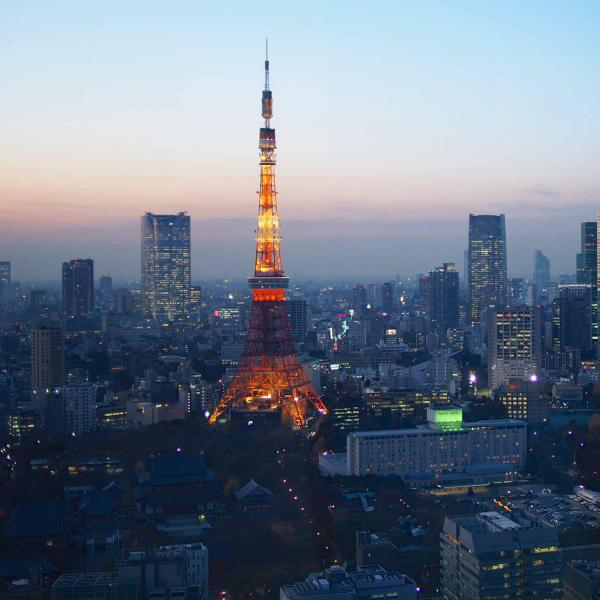

In [32]:
for 选取固有值的个数 in [10, 50, 100, 200, 400]:

    print(f"固有值总数量: {len(矩阵)}; 只使用其中的 {选取固有值的个数} 个进行重建")
    if 矩阵.ndim == 3 and 矩阵.shape[2] == 3:
        压缩矩阵 = [选取矩阵部分固有值进行压缩(矩阵[:,:,i], 选取固有值的个数) for i in range(3)]
        压缩矩阵 = np.stack(压缩矩阵, axis=-1)
    else:
        压缩矩阵 = 选取矩阵部分固有值进行压缩(矩阵, 选取固有值的个数)
    重建图像 = Image.fromarray(压缩矩阵)
    display(重建图像)
    print()

print("原图像")
display(Image.fromarray(矩阵.astype(np.uint8)))